$$\bf Оценка\ изменения\ резонансной\ частоты\ ячейки\ за\
счёт\ дрейфа\ концентрации\ для\ различных\ газов\ $$

Модель идеального газа, c - скорость звука в среде:
$$c = \sqrt{\gamma R T / M},$$
где T - температура в К, $\gamma - $ показатель адиабаты,  $ M - $ молярная масса газа, $R - $константа

В случае многокомпонентной смеси, показатель адиабаты:
$$\gamma = 1 + {1 \over \sum{n_i\over \gamma_i - 1}},$$
где $\gamma_i - $ показатель адиабаты i-ой компоненты смеси,
а $n_i-$ доля смеси в газе 

В случае многокомпонентной смеси, молярная масса смеси:
$$M = \sum M_i * n_i,$$
$M_i-$ молярная масса i-ой компоненты

Поскольку для ячейки, ожидается: $T \propto 1/c$, то
$$f \propto c$$

$$ {f \over f_0} = \sqrt{\gamma \over \gamma_0}*\sqrt{M_0 \over M}*\sqrt{T \over T_0},$$

где $f_0 - $ изначальная частота ячейки, а $f - $ новая частота ячейки.

Как видно, уравнение факторизуется, и можно рассматривать отдельно влияние дрейфа концентрации, и отдельно влияние дрейфа температуры


$$\bf Проведём \ оценку \ для \ элегаза \ \bf SF_6 $$

Для воздуха тогда из табличных данных (для сухого воздуха при 20 градусах):  

$\gamma_{air} = 1.4$

$M_{air} = 28.97$ г/моль

Для элегаза SF6 при 25 градусах(https://encyclopedia.airliquide.com/sulfur-hexafluoride#properties):  

$\gamma_{el} = 1.0984$

$M_{el} = 146.06$ г/моль

Для азота N2: 

$M_{N_2} = 28,01$ г/моль,

$\gamma_{N_2} = 1.4$ 

Для метана CH4:

$M_{CH_4} = 16.04$ г/моль,

$\gamma_{CH_4} = 1.3$ 



По работе И.В. Шерстова, резонансные частоты (таблица 1):

1766 Гц - чистый воздух 

1782 Гц - чистый $N_2$

1777 Гц - $N_2$ (99.9%) + $SF_6$ (0.1% = 10^3 ppm)

1736 Гц - $N_2$ (99%) + $SF_6$ (1% = 10^4 ppm)

1438 Гц - $N_2$ (90%) + $SF_6$ (10% = 10^5 ppm)

688  Гц - $N_2$ (0 %) + $SF_6$ (100% = 10^6 ppm)


Рассчёты, для примеси элегаза в чистом азоте:

In [69]:
import numpy as np
g_N2 = 1.4
g_SF6 = 1.0984
m_N2 = 28.01
m_SF6 = 146.06

# резонансная частота в чистом азоте:
freq_0 = 1782

exper = np.array([1782.0, 1777.0, 1736.0, 1438.0, 688.0])

# доля элегаза: 0.001 = 1000 ppm
n = np.array([0, 0.001, 0.01, 0.1, 1])


gamma_factor = (n / (g_SF6 - 1) + (g_N2 - n)/(g_N2 - 1) ) / ( g_N2 * (1 - n) / (g_N2 - 1) + g_N2 * n / (g_SF6 - 1) )


mass_factor = 1 / (1 - n + (m_SF6/m_N2)*n)

theory = freq_0*(np.sqrt(gamma_factor*mass_factor))

print("Experiment, Hz")
print(exper)

print("Theory, Hz")
print(np.round(theory,2))

print("Theory - Experiment, Hz")
print(np.round(theory - exper,2))


Experiment, Hz
[1782. 1777. 1736. 1438.  688.]
Theory, Hz
[1782.   1777.48 1738.16 1443.69  691.22]
Theory - Experiment, Hz
[0.   0.48 2.16 5.69 3.22]


Как видим, максимальная ошибка теории от эксперимента 5.7 гц,

В данном рассчёте не учитывался дрейф температуры в ходе их эксперимента на 0.4 градуса

Также, обращаю внимание на важность учёта сдвига частоты на элегазе 
из-за дрейфа концентрации элегаза в атмосфере азота. 


SF6 10^2 ppm - сдвиг на 0.5 Гц (1781.5 - теория, ? - эксперимент)

SF6 10^3 ppm - сдвиг на 5 Гц (1777.5 - теория, 1777.0 - эксперимент)

SF6 10^4 ppm - сдвиг на 46 Гц (1738.2 - теория, 1736.0 - эксперимент)

SF6 10^5 ppm - сдвиг на 344 Гц (1443.7 - теория, 1438 - эксперимент)


$$\bf Рассчёт \ для \ метана \ в \ атмосфере \ сухого \ воздуха \ при \ 20 \ градусах$$

In [61]:
import numpy as np
g_air = 1.4
g_CH4 = 1.3
m_air = 28.97
m_CH4 = 16.04

# резонансная частота в чистом азоте:
freq_0 = 1755


# доля элегаза: 0.001 = 1000 ppm
n = np.array([0, 0.0001, 0.001, 0.01, 0.1, 1])


gamma_factor = (n / (g_CH4 - 1) + (g_air - n)/(g_air - 1) ) / ( g_air * (1 - n) / (g_air - 1) + g_air * n / (g_CH4 - 1) )


mass_factor = 1 / (1 - n + (m_CH4/m_air)*n)

theory = freq_0*(np.sqrt(gamma_factor*mass_factor))

print("CH4, ppm")
print(n*1_000_000)
print("Theory, Hz")
print(np.round(theory,2))

print(np.round(theory - 1755,2))


CH4, ppm
[0.e+00 1.e+02 1.e+03 1.e+04 1.e+05 1.e+06]
Theory, Hz
[1755.   1755.03 1755.31 1758.09 1787.23 2272.78]
[0.0000e+00 3.0000e-02 3.1000e-01 3.0900e+00 3.2230e+01 5.1778e+02]


Таким образом:

CH4 10^2 ppm - сдвиг на 0.03 Гц (1766.03 - теория)

CH4 10^3 ppm - сдвиг на 0.31 Гц (1766.31 - теория)

CH4 10^4 ppm - сдвиг на 3.11 Гц (1769.11 - теория)

CH4 10^5 ppm - сдвиг на 32.4 Гц (1798.44 - теория)



Как видим для метана 

при 1000 ppm CH4 сдвиг частоты на 0.31 Гц

при 10000 ppm CH4 сдвиг частоты на 3.11 Гц

В то же время для элегаза

при 1000 ppm CH4 сдвиг частоты на 5 Гц

при 10000 ppm CH4 сдвиг частоты на 46 Гц

$$\bf Выводы$$

Таким образом в задаче с метаном, 

вклад свдига из-за дрейфа температуры 3 Гц/градус

куда более существенен чем сдвиг из-за концентрации 

вплоть до 10000 ppm сдвиг на 3 Гц (1% метана и 99 % cухого воздуха)


Для элегаза учет сдвига необходим начиная уже с

500 ppm сдвиг на 2.5 Гц

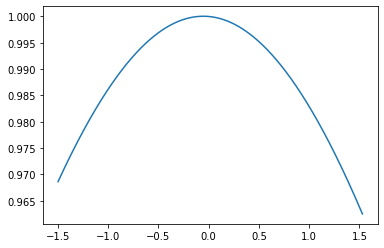

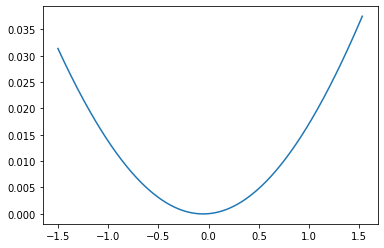

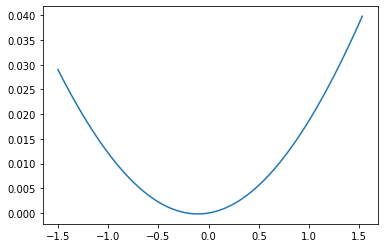

In [36]:
import numpy as np
import matplotlib.pyplot as plt
Q = 52
w_d = np.arange(-4.5,4.6,0.01)
w_0 = 1755

eps = w_d/w_0 

S_w0 = 1.0 / np.sqrt(Q**(-2) - Q**(-4)/4)

# print(S_w0)

S_w0_d = 1.0 / np.sqrt( (Q**(-2)/2 + 2*eps + eps**2 )**2 + Q**(-2) - Q**(-4)/2)

# print(S_w0_d)

# print(1 - S_w0_d/S_w0)




plt.figure()
plt.plot(w_d/3,S_w0_d/S_w0)
plt.show()





S_w0_d = 1.0 / np.sqrt( (Q**(-2)/2 + 2*eps + eps**2 )**2 + Q**(-2) - Q**(-4)/2)

# print(S_w0_d)

# print(1 - S_w0_d/S_w0)




plt.figure()
plt.plot(w_d/3, 1-S_w0_d/S_w0)
plt.show()




S_w0_d = 1.0 / np.sqrt( (Q**(-2)/2 + 2*eps + eps**2 )**2 + Q**(-2) * (1 - Q**(-2)/2) * (1+eps)**2)

# print(S_w0_d)

# print(1 - S_w0_d/S_w0)




plt.figure()
plt.plot(w_d/3, 1-S_w0_d/S_w0)
plt.show()




In [28]:
import numpy as np
import scipy.integrate
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
from io import StringIO
from scipy.fft import fft, fftfreq, rfft, rfftfreq
from scipy.optimize import curve_fit
import math


def func_theory(x, A, B):
    return A + B*x

popt, pcov = curve_fit(func_theory, N, OAD_Pyro)

Amp,alpha = popt

print('func: Amp, alpha:')
print(Amp,alpha)



point = np.arange(0, 2, 0.0001)
ans = func_theory(point, Amp, alpha)
# print('Fit')
# print(ans)


plt.subplots(sharey = True, figsize = (12, 10))
plt.plot(N, OAD_Pyro,'o')
plt.plot(point, ans)



NameError: name 'N' is not defined

In [51]:
import numpy as np

g = 1.4
m = 28.97*0.001
T = 273 + 20
R = 8.314

print(np.sqrt(g*T*R/m))


343.106219419913
